
Index No: 249321V 

Name: HDPR PERERA

In [2]:
# !pip install opencv-python
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Question 01

In [11]:
t1 = np.linspace(0, 49, 50).astype('uint8')
t2 = np.linspace(100, 254, 100).astype('uint8')
t3 = np.linspace(150, 255, 106).astype('uint8')

print(t1)
print(t2)
print(t3)

transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
print(len(transform))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
[100 101 103 104 106 107 109 110 112 114 115 117 118 120 121 123 124 126
 128 129 131 132 134 135 137 138 140 142 143 145 146 148 149 151 152 154
 156 157 159 160 162 163 165 166 168 170 171 173 174 176 177 179 180 182
 184 185 187 188 190 191 193 194 196 198 199 201 202 204 205 207 208 210
 212 213 215 216 218 219 221 222 224 226 227 229 230 232 233 235 236 238
 240 241 243 244 246 247 249 250 252 254]
[150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239
 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255]
256


In [13]:
img_orig = cv.imread('images/emma.jpg', cv.IMREAD_GRAYSCALE)
image_transformed = cv.LUT(img_orig, transform)


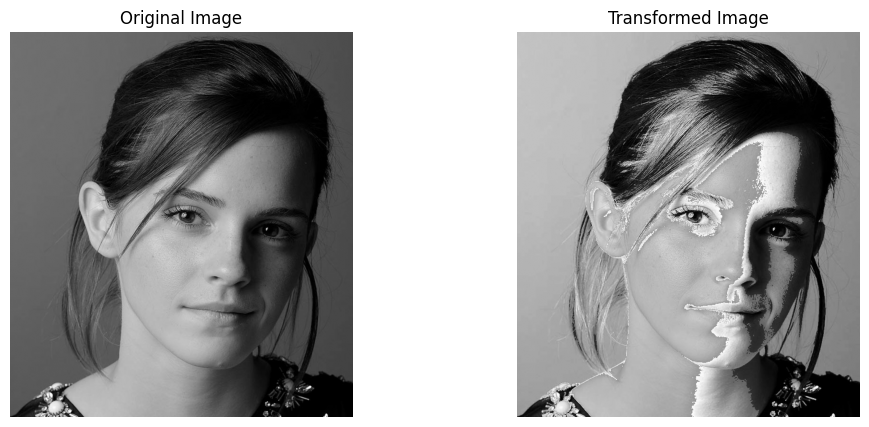

In [15]:
# Plot original vs transformed
plt.figure(figsize=(12,5))

# Original
plt.subplot(1, 2, 1)
plt.imshow(img_orig, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Transformed
plt.subplot(1, 2, 2)
plt.imshow(image_transformed, cmap='gray')
plt.title("Transformed Image")
plt.axis('off')

plt.show()

#### Question 02

In [ ]:
img = cv.imread('images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)

# (a) Enhance White Matter 
w1 = np.linspace(0, 0, 120).astype('uint8')
w2 = np.linspace(255, 255, 60).astype('uint8')
w3 = np.linspace(0, 0, 76).astype('uint8')
transform_white = np.concatenate((w1, w2, w3), axis=0).astype('uint8')
img_white = cv.LUT(img, transform_white)

# (b) Enhance Gray Matter
g1 = np.linspace(0, 0, 180).astype('uint8')
g2 = np.linspace(255, 255, 40).astype('uint8')
g3 = np.linspace(0, 0, 36).astype('uint8')
transform_gray = np.concatenate((g1, g2, g3), axis=0).astype('uint8')
img_gray = cv.LUT(img, transform_gray)

plt.figure(figsize=(15,8))

# Original
plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# White matter
plt.subplot(2, 3, 2)
plt.imshow(img_white, cmap='gray')
plt.title("White Matter Enhanced")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.plot(transform_white)
plt.title("White Matter Transformation")

# Gray matter
plt.subplot(2, 3, 5)
plt.imshow(img_gray, cmap='gray')
plt.title("Gray Matter Enhanced")
plt.axis('off')

plt.subplot(2, 3, 6)
plt.plot(transform_gray)
plt.title("Gray Matter Transformation")

plt.show()

#### Question 3

C:\Users\USER\AppData\Local\Temp\ipykernel_13224\1541100840.py:36: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(L.ravel(), 256, [0,256], color='gray')
C:\Users\USER\AppData\Local\Temp\ipykernel_13224\1541100840.py:40: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(L_corrected.ravel(), 256, [0,256], color='gray')


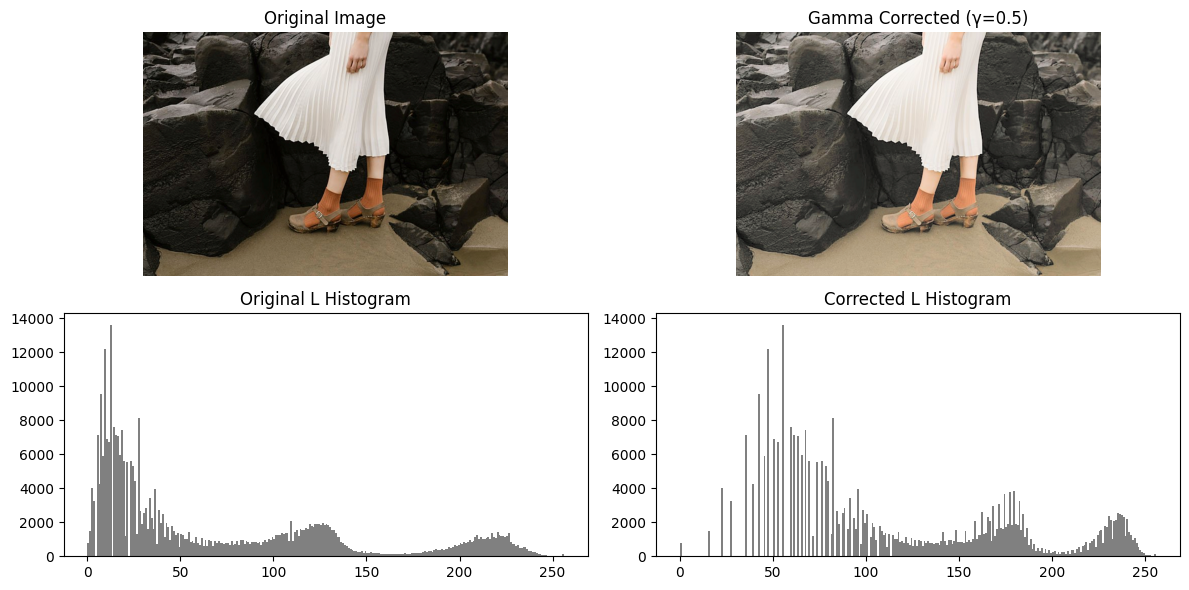

In [31]:
# Load image
img = cv.imread("images/highlights_and_shadows.jpg")  
img = cv.cvtColor(img, cv.COLOR_BGR2LAB) 

# Split into L, a, b
L, a, b = cv.split(img)

# Normalize L to 0-1
L_normalized = L / 255.0

# Apply gamma correction (example: gamma=0.5 -> brighten)
gamma = 0.5  
L_gamma = np.power(L_normalized, gamma)

# Rescale back to 0-255
L_corrected = np.uint8(L_gamma * 255)

# Merge corrected L with a and b
corrected_img = cv.merge([L_corrected, a, b])
corrected_img_bgr = cv.cvtColor(corrected_img, cv.COLOR_LAB2BGR)

# ---- Show Histograms ----
plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
plt.imshow(cv.cvtColor(cv.cvtColor(img, cv.COLOR_LAB2BGR), cv.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(cv.cvtColor(corrected_img_bgr, cv.COLOR_BGR2RGB))
plt.title(f"Gamma Corrected (γ={gamma})")
plt.axis("off")

plt.subplot(2,2,3)
plt.hist(L.ravel(), 256, [0,256], color='gray')
plt.title("Original L Histogram")

plt.subplot(2,2,4)
plt.hist(L_corrected.ravel(), 256, [0,256], color='gray')
plt.title("Corrected L Histogram")

plt.tight_layout()
plt.show()

#### Question 4

#### Question 5

#### Question 6

#### Question 7

#### Question 8

#### Question 9

#### Question 10